Neural Network from scratch!

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df=pd.read_csv('mnist.csv')

In [17]:
df.head(15)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data=np.array(df)
m,n =data.shape
np.random.shuffle(data)
print(m,n)

42000 785


In [19]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [20]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 8 2 ... 5 8 8] [2 7 8 ... 0 4 2]
0.08541463414634147
Iteration:  10
[6 8 4 ... 5 6 2] [2 7 8 ... 0 4 2]
0.1613658536585366
Iteration:  20
[9 8 1 ... 5 6 2] [2 7 8 ... 0 4 2]
0.25073170731707317
Iteration:  30
[9 8 1 ... 5 4 2] [2 7 8 ... 0 4 2]
0.329609756097561
Iteration:  40
[9 7 1 ... 5 4 2] [2 7 8 ... 0 4 2]
0.3990487804878049
Iteration:  50
[9 7 2 ... 5 4 6] [2 7 8 ... 0 4 2]
0.47353658536585364
Iteration:  60
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.5219512195121951
Iteration:  70
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.5595609756097562
Iteration:  80
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.5930731707317073
Iteration:  90
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.6218048780487805
Iteration:  100
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.6468536585365854
Iteration:  110
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.6661951219512195
Iteration:  120
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.6841219512195122
Iteration:  130
[8 7 2 ... 0 4 6] [2 7 8 ... 0 4 2]
0.6982926829268292
Iteration:  140

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


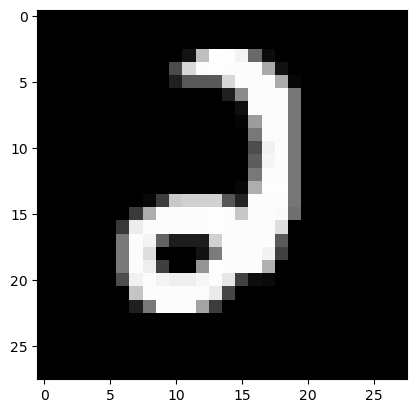

Prediction:  [9]
Label:  7


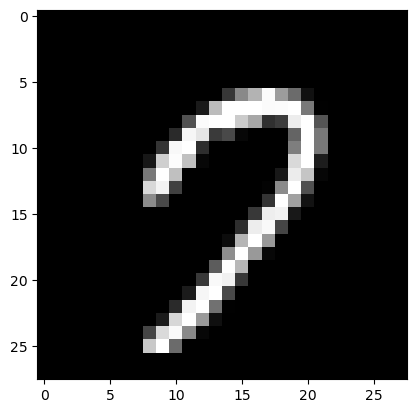

Prediction:  [8]
Label:  8


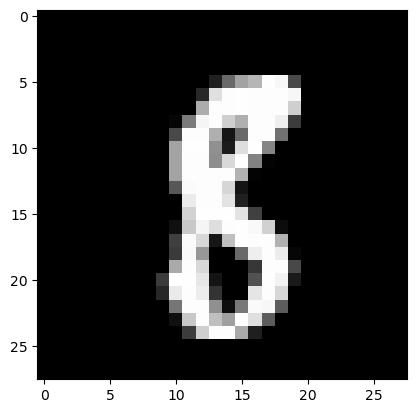

Prediction:  [3]
Label:  3


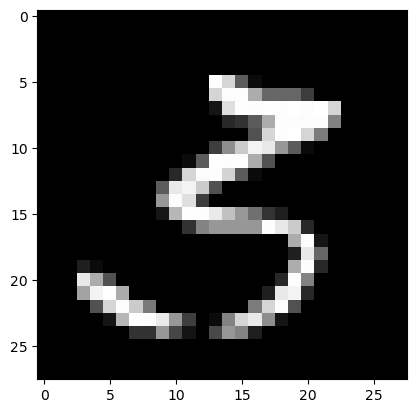

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 3 3 8 5 0 7 9 2 1 9 9 7 8 3 5 3 6 8 1 4 4 9 9 2 8 9 3 5 4 2 7 6 4 0 3 0
 6 9 3 6 6 9 6 8 1 5 7 3 5 3 0 1 4 7 7 2 4 5 9 5 7 0 6 6 9 1 4 2 5 3 1 1 3
 2 9 8 9 1 0 3 1 8 4 7 5 9 7 8 3 0 4 7 3 1 7 6 0 2 4 6 3 1 4 5 0 5 0 5 9 5
 1 6 5 9 6 1 0 8 5 9 3 7 7 2 4 3 0 1 0 8 4 8 7 4 1 3 4 7 5 6 3 9 1 2 8 4 0
 4 9 1 1 2 2 4 4 7 7 1 8 2 9 6 7 6 3 7 0 5 3 4 7 5 1 0 8 2 0 1 1 1 1 1 6 6
 0 8 7 4 1 4 2 1 4 7 1 8 4 7 2 8 6 6 5 9 8 0 8 2 6 7 0 4 7 8 4 8 7 1 2 3 2
 0 3 1 3 2 1 0 9 5 9 7 9 2 7 6 8 1 1 0 9 9 7 6 1 6 8 9 3 9 8 0 1 3 4 7 5 0
 2 5 5 4 5 7 0 7 6 1 3 6 6 0 1 5 1 1 1 8 0 3 4 3 1 2 0 6 6 9 0 9 1 2 9 1 4
 1 0 7 6 8 5 1 5 8 5 0 2 7 6 3 6 3 9 1 2 1 2 5 1 1 9 0 9 6 1 9 7 3 2 3 5 3
 1 9 6 7 2 1 3 3 7 0 2 4 1 7 6 9 3 8 0 1 0 7 5 3 5 8 5 9 4 9 8 5 3 1 9 0 1
 4 5 4 7 6 3 2 4 5 0 7 7 7 7 2 6 4 5 6 0 9 6 2 5 2 2 8 9 6 8 9 9 6 7 7 4 4
 6 9 5 4 8 3 1 4 6 5 4 2 4 5 1 0 3 6 4 0 2 3 5 5 0 3 3 7 7 6 2 9 1 1 5 9 9
 9 8 3 8 7 8 6 5 5 6 5 6 6 3 5 1 2 8 2 7 2 1 4 1 0 0 4 8 3 1 9 8 8 0 1 1 6
 1 7 2 8 7 2 3 9 1 2 8 3 

0.83